In [1]:
#the modules needed are imported
import pandas as pd
import numpy as np
import statsmodels.stats.api as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import pylab

#import the data and display the first 5 elements
df_pisa = pd.read_csv("PISA-2018-UK.csv")
df_pisa.head(5)

,math_score,read_score,scie_score,gender,immig,homelang,desk,room,quietplace,homecomputer,...,wealth,ictres,schlregion,schllocation,schltype,stratio,schsize,clsize,schid,stuid
0,408.95099,385.14871,426.54361,Female,Second-Generation,Other language,Yes,No,No,No,...,-1.2991,-1.2471,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82603288
1,467.38870,541.75861,488.95981,Female,Second-Generation,Language of the test,Yes,Yes,Yes,Yes,...,-1.4297,-0.3419,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604013
2,392.49649,300.32700,323.72211,Female,Second-Generation,Other language,Yes,Yes,Yes,Yes,...,-0.7750,-1.2014,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604218
3,574.38092,584.90240,529.17432,Female,Native,Language of the test,Yes,Yes,Yes,Yes,...,1.4432,1.2943,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82608603
4,494.03201,573.52588,491.84161,Female,Second-Generation,Language of the test,Yes,No,Yes,Yes,...,-0.8366,0.2272,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82610123


In [2]:
##New variables added to the dataframe which will be needed throughout the data analysis

#function that calculates the average scores
def AVERAGE(math_score,read_score,scie_score):
    ave = (math_score + read_score + scie_score)/3
    return ave

#variable average score is calculated and added to the dataframe
df_pisa["overall_score"] = df_pisa.apply(lambda x: AVERAGE(x["math_score"], x["read_score"], x["scie_score"]), axis = 1)

#categories created for the amount of ICT resources and Home resources students have available    
df_pisa["ICTres_available"] = pd.qcut(df_pisa["ictres"], q=[0, 0.2, 0.8, 1], labels=["low resources", "mid resources", "high resources"])
df_pisa["Homeres_available"] = pd.cut(df_pisa["hedres"],bins=[-2,-0.5,1,2.5], labels=["low res", "mid res", "high res"])

In [3]:
#new dataframe created with all the relevant variables for this data analysis
main_df = df_pisa[["math_score","read_score","scie_score","overall_score","immig","gender","homelang","wealth","hedres","Homeres_available", "wealth", "ictres","ICTres_available","schltype","stratio","schsize","clsize"]]
main_df.head(5)

,math_score,read_score,scie_score,overall_score,immig,gender,homelang,wealth,hedres,Homeres_available,wealth,ictres,ICTres_available,schltype,stratio,schsize,clsize
0,408.95099,385.14871,426.54361,406.881103,Second-Generation,Female,Other language,-1.2991,-1.5528,low res,-1.2991,-1.2471,low resources,Public,15.8053,893,21-25 students
1,467.38870,541.75861,488.95981,499.369040,Second-Generation,Female,Language of the test,-1.4297,0.2646,mid res,-1.4297,-0.3419,low resources,Public,15.8053,893,21-25 students
2,392.49649,300.32700,323.72211,338.848533,Second-Generation,Female,Other language,-0.7750,-0.6853,low res,-0.7750,-1.2014,low resources,Public,15.8053,893,21-25 students
3,574.38092,584.90240,529.17432,562.819213,Native,Female,Language of the test,1.4432,1.1793,high res,1.4432,1.2943,mid resources,Public,15.8053,893,21-25 students
4,494.03201,573.52588,491.84161,519.799833,Second-Generation,Female,Language of the test,-0.8366,-0.4884,mid res,-0.8366,0.2272,mid resources,Public,15.8053,893,21-25 students


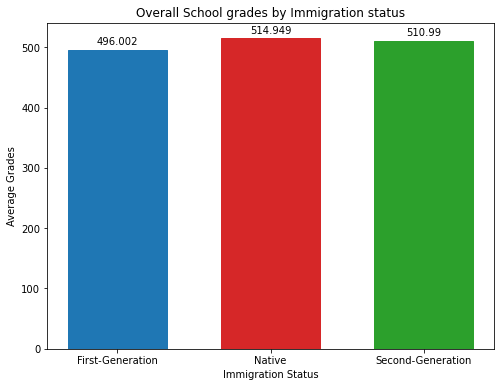

In [4]:
#(1): Bar chart that compares avarage grades for each immigration status

#increase the size of the figure
plt.figure(figsize=(8,6))

#create a list with all immigration status
im_status = main_df["immig"].unique().tolist()

#needed to edit the list so it fit for this data
im_status[0] = ("First-Generation")
im_status[2] = ("Second-Generation")

#average grades split by immigration status
average_score = main_df.groupby("immig")["overall_score"]
score_by_im = average_score.mean()

#bar chart created
bar = plt.bar(im_status, score_by_im, width = 0.65)

#colours of the bars set
bar[0].set_color('tab:blue')
bar[1].set_color('tab:red')
bar[2].set_color('tab:green')


#labels added
plt.xlabel("Immigration Status")
plt.title("Overall School grades by Immigration status")
plt.ylabel("Average Grades")

#add bar labels
plt.bar_label(bar, padding = 3)

#show the diagram
plt.show()

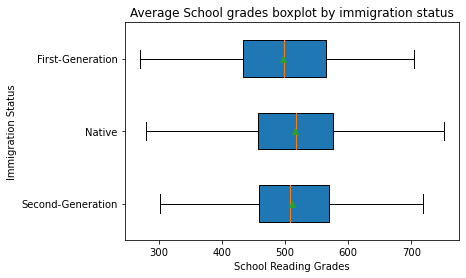

In [5]:
#(2)BOXPLOT comparing scores of each immigration group:

#needed to edit the list so it fit for this data
im_status[2] = "First-Generation"
im_status[0] = "Second-Generation"

#overall grades calculated for each immigration group
im_grades = [main_df.loc[main_df["immig"] == status, "overall_score"]for status in im_status]

#boxplot drawn
plt.boxplot(im_grades,
           labels = im_status,
           showfliers = False,
           showmeans = True,
           vert = False,
           patch_artist = True,
           widths = 0.5)

#labels added
plt.xlabel("School Reading Grades")
plt.title("Average School grades boxplot by immigration status")

#have had a few times where the ylabel does not go on correctly due to the import function being altered, 
#if this occurs when marking click kernel and then restart and run all

plt.ylabel("Immigration Status")


#diagram shown
plt.show()


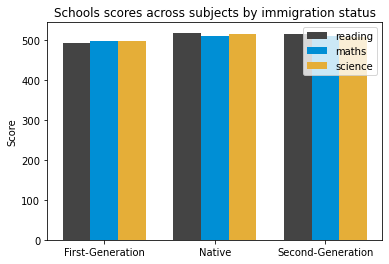

In [6]:
#(3)Barchart for each subject score based on immigration status:

#needed to edit the list so it fit for this data
im_status[0] = ("First-Generation")
im_status[2] = ("Second-Generation")

#calculate the average scores for each subject
readings = main_df.groupby("immig")["read_score"]
mean_read = readings.mean()

maths = main_df.groupby("immig")["math_score"]
mean_math = maths.mean()

science = main_df.groupby("immig")["scie_score"]
mean_scie = science.mean()

#Set barchart labels location and width of bars
x = np.arange(len(im_status))
width = 0.25

#create the bars
plt.bar(x - width, mean_read, width = width, color = "#444444", label = "reading")
plt.bar(x, mean_math, width = width, color = "#008fd5", label = "maths")
plt.bar(x + width , mean_scie, width = width, color = "#e5ae38", label = "science")

#label the axis
plt.xticks(x, labels = im_status)
plt.ylabel ("Score")
plt.title("Schools scores across subjects by immigration status")

#legend created and diagram shown
plt.legend()
plt.show()

In [7]:
#Hypothesis test between overall school grades:

#sub samples for each group
score_native = average_score.get_group("Native")
score_first_gen = average_score.get_group("First-Generation")
score_second_gen = average_score.get_group("Second-Generation")

#check means
print(f"The mean score for a native student is: {score_native.mean()}")
print(f"The mean score for a 1st gen student is: {score_first_gen.mean()}")
print(f"The mean score for a 2nd Gen student is: {score_second_gen.mean()}\n")

#test 1: for means equality between first generation and natives
tstat, pvalue, df = stats.ttest_ind(score_native, score_first_gen, alternative = "two-sided")
print(f"Test 1 between natives and first generation students:")
print(f"H0: μnative scores = μfirst generation scores")
print(f"H1: μnative scores ≠ μfirst generation scores")
print(f"The value of t-stat  for test 1 is statistic is: {tstat}")
print(f"The value of the p-value  for test 1 is: {pvalue}\n")

#test 2: for means equality between second generation and natives
tstat, pvalue, df = stats.ttest_ind(score_native, score_second_gen, alternative = "two-sided")
print(f"Test 2 between natives and second generation students:")
print(f"H0: μnative scores = μsecond generation scores")
print(f"H1: μnative scores ≠ μsecond generation scores")
print(f"The value of t-stat  for test 2 is statistic is: {tstat}")
print(f"The value of the p-value  for test 2 is: {pvalue}")

The mean score for a native student is: 514.9491011386906
The mean score for a 1st gen student is: 496.0020475584416
The mean score for a 2nd Gen student is: 510.99002633507837

Test 1 between natives and first generation students:
H0: μnative scores = μfirst generation scores
H1: μnative scores ≠ μfirst generation scores
The value of t-stat  for test 1 is statistic is: 4.339754910160172
The value of the p-value  for test 1 is: 1.4514323799579699e-05

Test 2 between natives and second generation students:
H0: μnative scores = μsecond generation scores
H1: μnative scores ≠ μsecond generation scores
The value of t-stat  for test 2 is statistic is: 0.9112458771337439
The value of the p-value  for test 2 is: 0.36220494031703343


In [8]:
#Hypothesis test between the reading scores

#create sub-samples:
read_native = readings.get_group("Native")
read_genone = readings.get_group("First-Generation")
read_gentwo = readings.get_group("Second-Generation")

#check means
print(f"The mean score for a native student is: {read_native.mean()}")
print(f"The mean score for a 1st gen student is: {read_genone.mean()}")
print(f"The mean score for a 2nd Gen student is: {read_gentwo.mean()}\n")

#test: for means equality between first generation and natives
tstat, pvalue, df = stats.ttest_ind(read_native, read_genone, alternative = "two-sided")
print(f"H0: μnative reading scores = μsecond generation reading scores")
print(f"H1: μnative reading scores ≠ μsecond generation reading scores")
print(f"The value of t-stat for the test statistic is: {tstat}")
print(f"The value of the p-value is: {pvalue}\n")

The mean score for a native student is: 518.6097853217497
The mean score for a 1st gen student is: 492.2863755324676
The mean score for a 2nd Gen student is: 515.6527416230371

H0: μnative reading scores = μsecond generation reading scores
H1: μnative reading scores ≠ μsecond generation reading scores
The value of t-stat for the test statistic is: 5.476529168219188
The value of the p-value is: 4.525808382082481e-08



In [9]:
main_df.head(5)

,math_score,read_score,scie_score,overall_score,immig,gender,homelang,wealth,hedres,Homeres_available,wealth,ictres,ICTres_available,schltype,stratio,schsize,clsize
0,408.95099,385.14871,426.54361,406.881103,Second-Generation,Female,Other language,-1.2991,-1.5528,low res,-1.2991,-1.2471,low resources,Public,15.8053,893,21-25 students
1,467.38870,541.75861,488.95981,499.369040,Second-Generation,Female,Language of the test,-1.4297,0.2646,mid res,-1.4297,-0.3419,low resources,Public,15.8053,893,21-25 students
2,392.49649,300.32700,323.72211,338.848533,Second-Generation,Female,Other language,-0.7750,-0.6853,low res,-0.7750,-1.2014,low resources,Public,15.8053,893,21-25 students
3,574.38092,584.90240,529.17432,562.819213,Native,Female,Language of the test,1.4432,1.1793,high res,1.4432,1.2943,mid resources,Public,15.8053,893,21-25 students
4,494.03201,573.52588,491.84161,519.799833,Second-Generation,Female,Language of the test,-0.8366,-0.4884,mid res,-0.8366,0.2272,mid resources,Public,15.8053,893,21-25 students


In [10]:
##regression:

#create the model:
#overall model to get an idea of how strong the coefficients are
model = smf.ols('overall_score ~ C(homelang) + hedres + wealth + ictres + stratio + C(schltype)', data = main_df).fit()

#Linear regressions between the variables with the highest coefficients
lang_model = smf.ols('overall_score ~ C(homelang)', data = main_df).fit()
homeres_model = smf.ols('overall_score ~  + hedres', data = main_df).fit()
ictres_model = smf.ols('overall_score ~  + ictres', data = main_df).fit()
school_model = smf.ols('overall_score ~  + C(schltype)', data = main_df).fit()
#model.summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     113.6
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          4.78e-157
Time:                        17:40:35   Log-Likelihood:                -34649.
No. Observations:                6004   AIC:                         6.931e+04
Df Residuals:                    5996   BIC:                         6.937e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            487.9974      6.416     76.062      0.000     475.420     500.575
C(homelang)[T.Other language]        -23.4224      3.717     -6.301      0.000     -30.710     -16.135
C(schltype)[T.Private Independent]    73.5736      5.025     14.641      0.000      63.722      83.425
C(schltype)[T.Public]                -16.8057      2.263     -7.427      0.000     -21.241     -12.370
hedres                                13.7876      1.093     12.617      0.000      11.645      15.930
wealth[0]                             -4.4822      0.870     -5.153      0.000      -6.188      -2.777
wealth[1]                             -4.4822      0.870     -5.153      0.000      -6.188      -2.777
ictres                                 7.8414      1.401      5.598      0.000       5.095      10.587
stratio                                1.9744      0.362      5.461      0.000       1.266       2.683
==============================================================================
Omnibus:                       59.342   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.547
Skew:                          -0.150   Prob(JB):                     2.87e-11
Kurtosis:                       2.677   Cond. No.                     1.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
#summarise the linear regression between school variables and the overall score
school_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           6.50e-96
Time:                        17:40:35   Log-Likelihood:                -34803.
No. Observations:                6004   AIC:                         6.961e+04
Df Residuals:                    6001   BIC:                         6.963e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            521.7656      1.860    280.586      0.000     518.120     525.411
C(schltype)[T.Private Independent]    59.7076      4.126     14.471      0.000      51.619      67.796
C(schltype)[T.Public]                -20.9936      2.275     -9.230      0.000     -25.453     -16.535
==============================================================================
Omnibus:                       69.158   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.395
Skew:                          -0.179   Prob(JB):                     2.09e-13
Kurtosis:                       2.675   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#summarise the linear regression between language variable and the overall score
lang_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     30.85
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.91e-08
Time:                        17:40:35   Log-Likelihood:                -35007.
No. Observations:                6004   AIC:                         7.002e+04
Df Residuals:                    6002   BIC:                         7.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       515.2514      1.110    464.021      0.000     513.075     517.428
C(homelang)[T.Other language]   -21.5017      3.871     -5.554      0.000     -29.090     -13.913
==============================================================================
Omnibus:                       92.653   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.682
Skew:                          -0.160   Prob(JB):                     2.01e-15
Kurtosis:                       2.590   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#summarise the linear regression between home resource variable and the overall score
homeres_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     274.2
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.90e-60
Time:                        17:40:35   Log-Likelihood:                -34889.
No. Observations:                6004   AIC:                         6.978e+04
Df Residuals:                    6002   BIC:                         6.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    511.1944      1.052    485.914      0.000     509.132     513.257
hedres        17.2262      1.040     16.560      0.000      15.187      19.265
==============================================================================
Omnibus:                       55.887   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.764
Skew:                          -0.144   Prob(JB):                     1.15e-10
Kurtosis:                       2.683   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#summarise the linear regression between ict resource variable and the overall score
ictres_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.15e-31
Time:                        17:40:35   Log-Likelihood:                -34955.
No. Observations:                6004   AIC:                         6.991e+04
Df Residuals:                    6002   BIC:                         6.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    507.3384      1.178    430.844      0.000     505.030     509.647
ictres        11.2725      0.962     11.722      0.000       9.387      13.158
==============================================================================
Omnibus:                       74.675   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.962
Skew:                          -0.163   Prob(JB):                     1.57e-13
Kurtosis:                       2.640   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

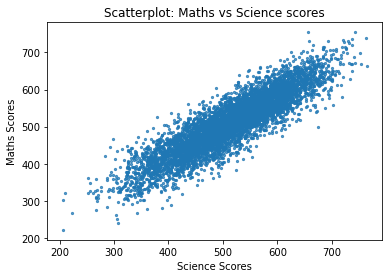

In [15]:
#scatter the results between subjects maths and science to see correlation
plt.scatter('scie_score','math_score',data = main_df, s = 5,edgecolor = 'tab:blue', linewidth = 1, alpha = 0.75)

#info
plt.title('Scatterplot: Maths vs Science scores')
plt.xlabel("Science Scores")
plt.ylabel("Maths Scores")

plt.show()


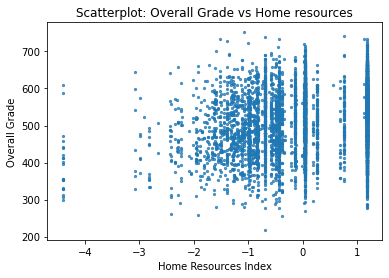

In [16]:
#visualise the regression: scatter graph for hedres and overall score:
#plt.figure(figsize=(16,14))

#create the scatter
plt.scatter('hedres','overall_score',data = main_df,s = 5,edgecolor = 'tab:blue', linewidth = 1, alpha = 0.75)

#info:
plt.title('Scatterplot: Overall Grade vs Home resources')
plt.xlabel("Home Resources Index")
plt.ylabel("Overall Grade")

plt.show()

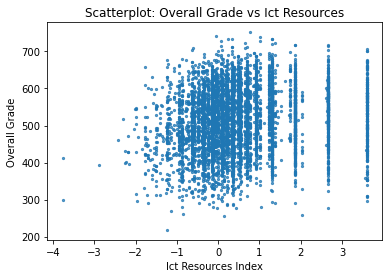

In [17]:
#visualise the regression: scatter graph for ict resourcees and overall score:

#create the scatter
plt.scatter('ictres','overall_score',data = main_df,s = 5,edgecolor = 'tab:blue', linewidth = 1, alpha = 0.75)

#info:
plt.title('Scatterplot: Overall Grade vs Ict Resources')
plt.xlabel("Ict Resources Index")
plt.ylabel("Overall Grade")

plt.show()

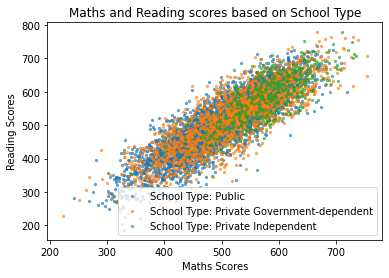

In [18]:
#create labels for private/public school
school_labels = main_df["schltype"].unique().tolist()

#For each subgroup (public/private school), get reading and maths data
int_math = [main_df.loc[main_df["schltype"] == label, "math_score"]for label in school_labels]
int_read = [main_df.loc[main_df["schltype"] == label, "read_score"]for label in school_labels]

#create the scatter graph
for lbl, math_data, read_data in zip(school_labels, int_math, int_read):
    plt.scatter(math_data, read_data, label=f"School Type: {lbl}", alpha = 0.6, s=5)
    
#Legend and Labels added
plt.legend()
plt.title('Maths and Reading scores based on School Type')
plt.xlabel('Maths Scores')
plt.ylabel('Reading Scores')

#show diagram
plt.show()

In [19]:
#create a frequency table for immigration status and the no in each school type
schl_frequency = main_df.groupby(["immig","schltype"]).size()
schl_frequency


immig              schltype                    
First-Generation   Private Government-dependent     118
                   Private Independent               46
                   Public                           221
Native             Private Government-dependent    1537
                   Private Independent              363
                   Public                          3337
Second-Generation  Private Government-dependent     181
                   Private Independent               59
                   Public                           142
dtype: int64

In [20]:
#create a frequency table for immigration status and the ict resource type
ictres_frequency = main_df.groupby(["immig","ICTres_available"]).size()
ictres_frequency

immig              ICTres_available
First-Generation   low resources        122
                   mid resources        236
                   high resources        27
Native             low resources       1008
                   mid resources       3290
                   high resources       939
Second-Generation  low resources         74
                   mid resources        260
                   high resources        48
dtype: int64

In [21]:
#create a frequency table for immigration status and the ict resource type
homeres_frequency = main_df.groupby(["immig","Homeres_available"]).size()
homeres_frequency

immig              Homeres_available
First-Generation   low res                85
                   mid res               143
                   high res              148
Native             low res              1308
                   mid res              1850
                   high res             1974
Second-Generation  low res                77
                   mid res               129
                   high res              172
dtype: int64

In [24]:
#frequency table to see how immigration status affects language spoken at home
lang_freq = main_df.groupby(["immig","homelang"]).size()
lang_freq

immig              homelang            
First-Generation   Language of the test     126
                   Other language           259
Native             Language of the test    5129
                   Other language           108
Second-Generation  Language of the test     255
                   Other language           127
dtype: int64